In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = "2005-01-01"
end = "2023-12-31"
stock = "TCS.NS"

dataset = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,166.932495,169.587494,166.932495,169.157501,119.614922,4734168
2005-01-04,168.750000,169.250000,166.645004,167.657501,118.554260,4979104
2005-01-05,167.524994,167.524994,160.037506,165.625000,117.117050,9604320
2005-01-06,165.000000,168.250000,161.562500,165.057495,116.715790,8006888
2005-01-07,166.250000,168.125000,164.082504,167.494995,118.439323,7623136
...,...,...,...,...,...,...
2023-12-22,3800.000000,3845.949951,3762.000000,3824.000000,3806.362549,2413058
2023-12-26,3819.850098,3834.000000,3790.149902,3795.550049,3778.043701,1285231
2023-12-27,3799.000000,3818.199951,3768.000000,3811.199951,3793.621338,1293976


In [7]:
dataset.reset_index(inplace = True)

In [8]:
dataset
#adds a new column of reference on the left of the dates

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2005-01-03,166.932495,169.587494,166.932495,169.157501,119.614922,4734168
1,1,2005-01-04,168.750000,169.250000,166.645004,167.657501,118.554260,4979104
2,2,2005-01-05,167.524994,167.524994,160.037506,165.625000,117.117050,9604320
3,3,2005-01-06,165.000000,168.250000,161.562500,165.057495,116.715790,8006888
4,4,2005-01-07,166.250000,168.125000,164.082504,167.494995,118.439323,7623136
...,...,...,...,...,...,...,...,...
4683,4683,2023-12-22,3800.000000,3845.949951,3762.000000,3824.000000,3806.362549,2413058
4684,4684,2023-12-26,3819.850098,3834.000000,3790.149902,3795.550049,3778.043701,1285231
4685,4685,2023-12-27,3799.000000,3818.199951,3768.000000,3811.199951,3793.621338,1293976
4686,4686,2023-12-28,3824.000000,3838.000000,3792.100098,3799.899902,3782.373535,1682889


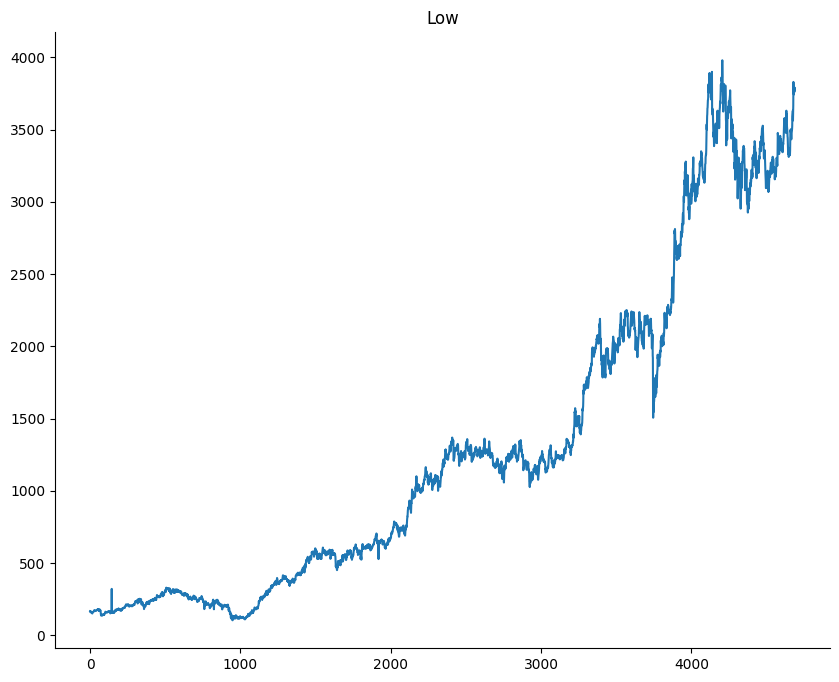

In [ ]:
from matplotlib import pyplot as plt
dataset['Low'].plot(kind='line', figsize=(10, 8), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
ma_100 = dataset.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

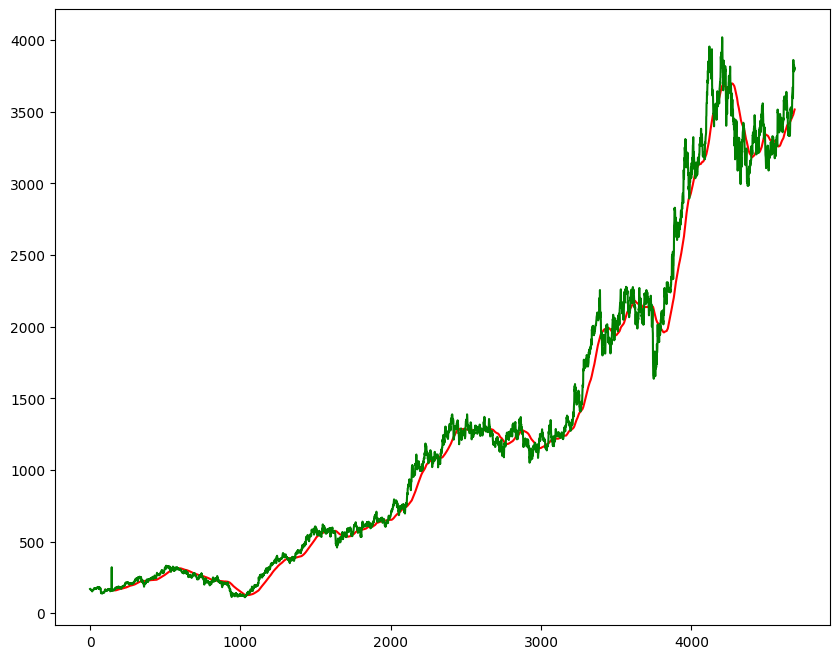

In [10]:
plt.figure(figsize = (10,8))
plt.plot(ma_100, "r")
plt.plot(dataset.Close, "g")
plt.show

In [11]:
ma_200 = dataset.Close.rolling(200).mean() #mean average for the last 200 days

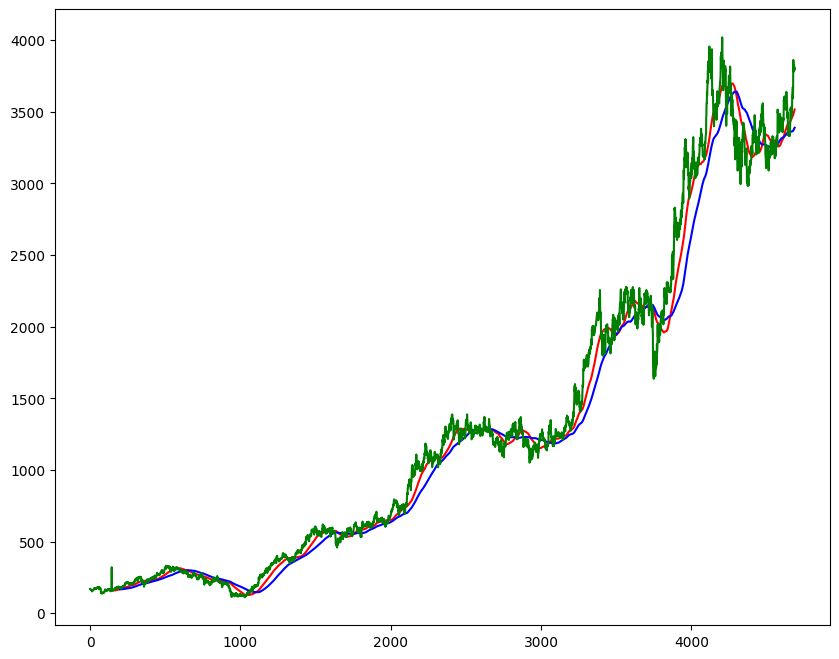

In [12]:
plt.figure(figsize=(10,8))
plt.plot(ma_100, "r")
plt.plot(ma_200, "b")
plt.plot(dataset.Close, "g")
plt.show()

In [13]:
dataset.dropna (inplace = True)
#drops the rows with values contained as null

Splitting intro test and test from now

In [14]:
split_index = int(len(dataset) * 0.80)
data_train = pd.DataFrame(dataset.Close[:split_index])
data_test = pd.DataFrame(dataset.Close[split_index:])

In [15]:
data_train
#3554 columns for as training dataset , hence verified

,Close
0,169.157501
1,167.657501
2,165.625000
3,165.057495
4,167.494995
...,...
3745,1769.849976
3746,1806.300049
3747,1696.400024
3748,1658.000000


In [16]:
data_test
#889 for test data set, hence verified

,Close
3750,1636.349976
3751,1797.449951
3752,1669.699951
3753,1703.150024
3754,1750.300049
...,...
4683,3824.000000
4684,3795.550049
4685,3811.199951
4686,3799.899902


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)

### ***Over here we're going to be using 100 days data to predict the data of the 101st day***

In [19]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [20]:
 #to convert x and y as array because it was giving error while it wasen't
x , y = np.array(x) , np.array(y)

# Creating a Model




In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()

model.add(LSTM(units = 50 , activation = "relu", return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = "relu" , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 100 , activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [23]:
model.compile(optimizer = "adam" , loss = "mean_squared_error")

In [ ]:
model.fit(x,y , epochs = 50 , batch_size = 32 , verbose = 1)

Epoch 1/50
25/25 [==============================] - 23s 691ms/step - loss: 0.1772
Epoch 2/50
25/25 [==============================] - 15s 603ms/step - loss: 0.0237
Epoch 3/50
25/25 [==============================] - 15s 604ms/step - loss: 0.0206
Epoch 4/50
25/25 [==============================] - 15s 604ms/step - loss: 0.0194
Epoch 5/50
25/25 [==============================] - 15s 606ms/step - loss: 0.0174
Epoch 6/50
25/25 [==============================] - 15s 618ms/step - loss: 0.0156
Epoch 7/50
25/25 [==============================] - 16s 631ms/step - loss: 0.0173
Epoch 8/50
25/25 [==============================] - 15s 599ms/step - loss: 0.0150
Epoch 9/50
25/25 [==============================] - 15s 601ms/step - loss: 0.0174
Epoch 10/50
25/25 [==============================] - 15s 610ms/step - loss: 0.0149
Epoch 11/50
25/25 [==============================] - 15s 607ms/step - loss: 0.0156
Epoch 12/50
25/25 [==============================] - 16s 649ms/step - loss: 0.0157
Epoch 13/50
2

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               7

# VISUALIZING THE MODEL WORK

In [25]:
from keras.utils import plot_model

model = Sequential()

model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Generate a visual representation of the model architecture
plot_model(model, to_file="lstm_model.png", show_shapes=True)
print("Model visualization saved as lstm_model.png")

Model visualization saved as lstm_model.png


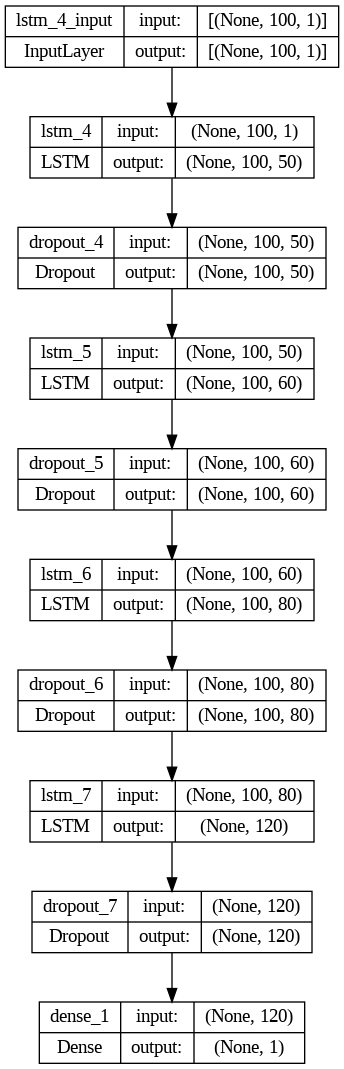

In [26]:
from IPython.display import Image

# Generate the image file
plot_model(model, to_file="lstm_model.png", show_shapes=True)

# Display the image in the notebook
Image(filename="lstm_model.png")


## Testing the model now

In [ ]:
days_100 = data_train.tail(100)

In [ ]:
data_test = pd.concat([days_100, data_test], ignore_index = True)
data_test

,Close
0,2124.949951
1,2115.699951
2,2194.850098
3,2252.800049
4,2269.649902
...,...
1133,3824.000000
1134,3795.550049
1135,3811.199951
1136,3799.899902


In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

window_size = 250

for i in range(window_size ,data_test_scale.shape[0]):
  x.append(data_test_scale[i-window_size:i])
  y.append(data_test_scale[i,0])

x = np.array(x)
y = np.array(y)

In [ ]:
y_predict = model.predict(x)

28/28 [==============================] - 6s 193ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_predict = y_predict * scale

In [ ]:
y = y*scale

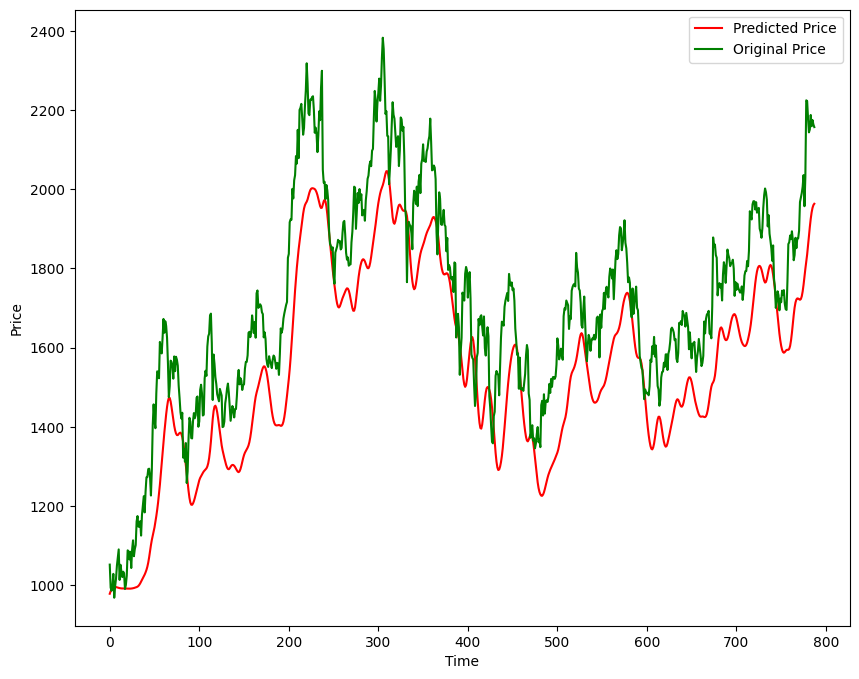

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, "r", label = "Predicted Price")
plt.plot(y , "g" , label = "Original Price")
plt.xlabel ("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

## THE ABOVE IS THE MAIN OUTPUT PREDICTION 👆

In [ ]:
dataset
#for referencing

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,166.932495,169.587494,166.932495,169.157501,119.615044,4734168
1,2005-01-04,168.750000,169.250000,166.645004,167.657501,118.554268,4979104
2,2005-01-05,167.524994,167.524994,160.037506,165.625000,117.117035,9604320
3,2005-01-06,165.000000,168.250000,161.562500,165.057495,116.715744,8006888
4,2005-01-07,166.250000,168.125000,164.082504,167.494995,118.439339,7623136
...,...,...,...,...,...,...,...
4683,2023-12-22,3800.000000,3845.949951,3762.000000,3824.000000,3806.362549,2413058
4684,2023-12-26,3819.850098,3834.000000,3790.149902,3795.550049,3778.043701,1285231
4685,2023-12-27,3799.000000,3818.199951,3768.000000,3811.199951,3793.621338,1293976
4686,2023-12-28,3824.000000,3838.000000,3792.100098,3799.899902,3782.373535,1682889


In [ ]:
scale
#for referencing

array([2382.79992676])